**Applied Statistics**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [14]:
# Python set up (load modules) 
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set() 
import itertools

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-a)" data-toc-modified-id="Task-a)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task a)</a></span></li><li><span><a href="#Task-b)" data-toc-modified-id="Task-b)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task b)</a></span></li><li><span><a href="#Task-c)" data-toc-modified-id="Task-c)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task c)</a></span><ul class="toc-item"><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Multiple Linear Regression</a></span></li><li><span><a href="#c3)-Interpretation" data-toc-modified-id="c3)-Interpretation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>c3) Interpretation</a></span></li><li><span><a href="#1)-Residuals-vs-fitted-plot" data-toc-modified-id="1)-Residuals-vs-fitted-plot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>1) Residuals vs fitted plot</a></span></li><li><span><a href="#2)-Normal-Q-Q" data-toc-modified-id="2)-Normal-Q-Q-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>2) Normal Q-Q</a></span></li><li><span><a href="#Scale-Location-plot" data-toc-modified-id="Scale-Location-plot-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Scale-Location plot</a></span></li><li><span><a href="#Residuals-vs-leverage-plot" data-toc-modified-id="Residuals-vs-leverage-plot-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Residuals vs leverage plot</a></span></li></ul></li><li><span><a href="#Task-e)" data-toc-modified-id="Task-e)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task e)</a></span></li><li><span><a href="#Task-e)-Part-II" data-toc-modified-id="Task-e)-Part-II-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Task e) Part II</a></span></li></ul></div>

# Assignment 2: Multiple Linear regression 

This question involves the use of multiple linear regression on the Auto data set. In particular, only use **observations 1 to 200** for your analysis. 

- (a) Produce a scatterplot matrix which includes all of the variables in the data set.


- (b) Compute the matrix of correlations between the variables using the function cor(). 


- (c) Use the statsmodel ols function to perform a multiple linear regression (ols) with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:
   1. Is there a relationship between the predictors and the response?
   2. Which predictors appear to have a statistically significant relationship to the response?
   3. What does the coefficient for the year variable suggest?
   
   
- (d) Use some diagnostic plots (1. Residuals vs fitted plot, 2. Normal Q-Q plot, 3. Scale-location plot, 4. Residuals vs leverage plot) to describe the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?


- (e) Use the * and : symbols to fit linear regression models (ols) with interaction effects. Do any interactions appear to be statistically significant? 

- (f) Fit a new simple regression model with the dependent variable mpg and the predictor variable horsepower. Try different transformations of the X variable 'horsepower', such as log(X), sqrt(x) and $X^2$ and compare the fit with the simple model without transformation. Use the 


     - adjusted R-squared, 
     - mean squared error of residuals (MSE), 
     - the F-Statistic, 
     - the Bayesian Information Criterion (BIC) and
     - Akaike's Information criterion (AIC) 
     
     to comment on your findings. 
   
  Hint: given a predictor X, we can create a predictor $X^2$ using $I(X**2)$. The function I() is needed since somy symbols have a special meaning in a formula. Furthermore, you can use np.sqrt(X) and np.log(X).

---

# Import data

In [2]:
PATH = '/Users/jankirenz/Dropbox/Data/' 
df = pd.read_csv(PATH + 'Auto.csv')
df = df.iloc[0:200]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
mpg             200 non-null float64
cylinders       200 non-null int64
displacement    200 non-null float64
horsepower      200 non-null object
weight          200 non-null int64
acceleration    200 non-null float64
year            200 non-null int64
origin          200 non-null int64
name            200 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 14.1+ KB


In [3]:
# change data type
df['origin'] = pd.Categorical(df['origin'])
df['name'] = pd.Categorical(df['name'])
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') # solution

In [4]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [5]:
df = df.dropna()

## Task a)

Produce a scatterplot matrix which includes all of the variables in the data set.

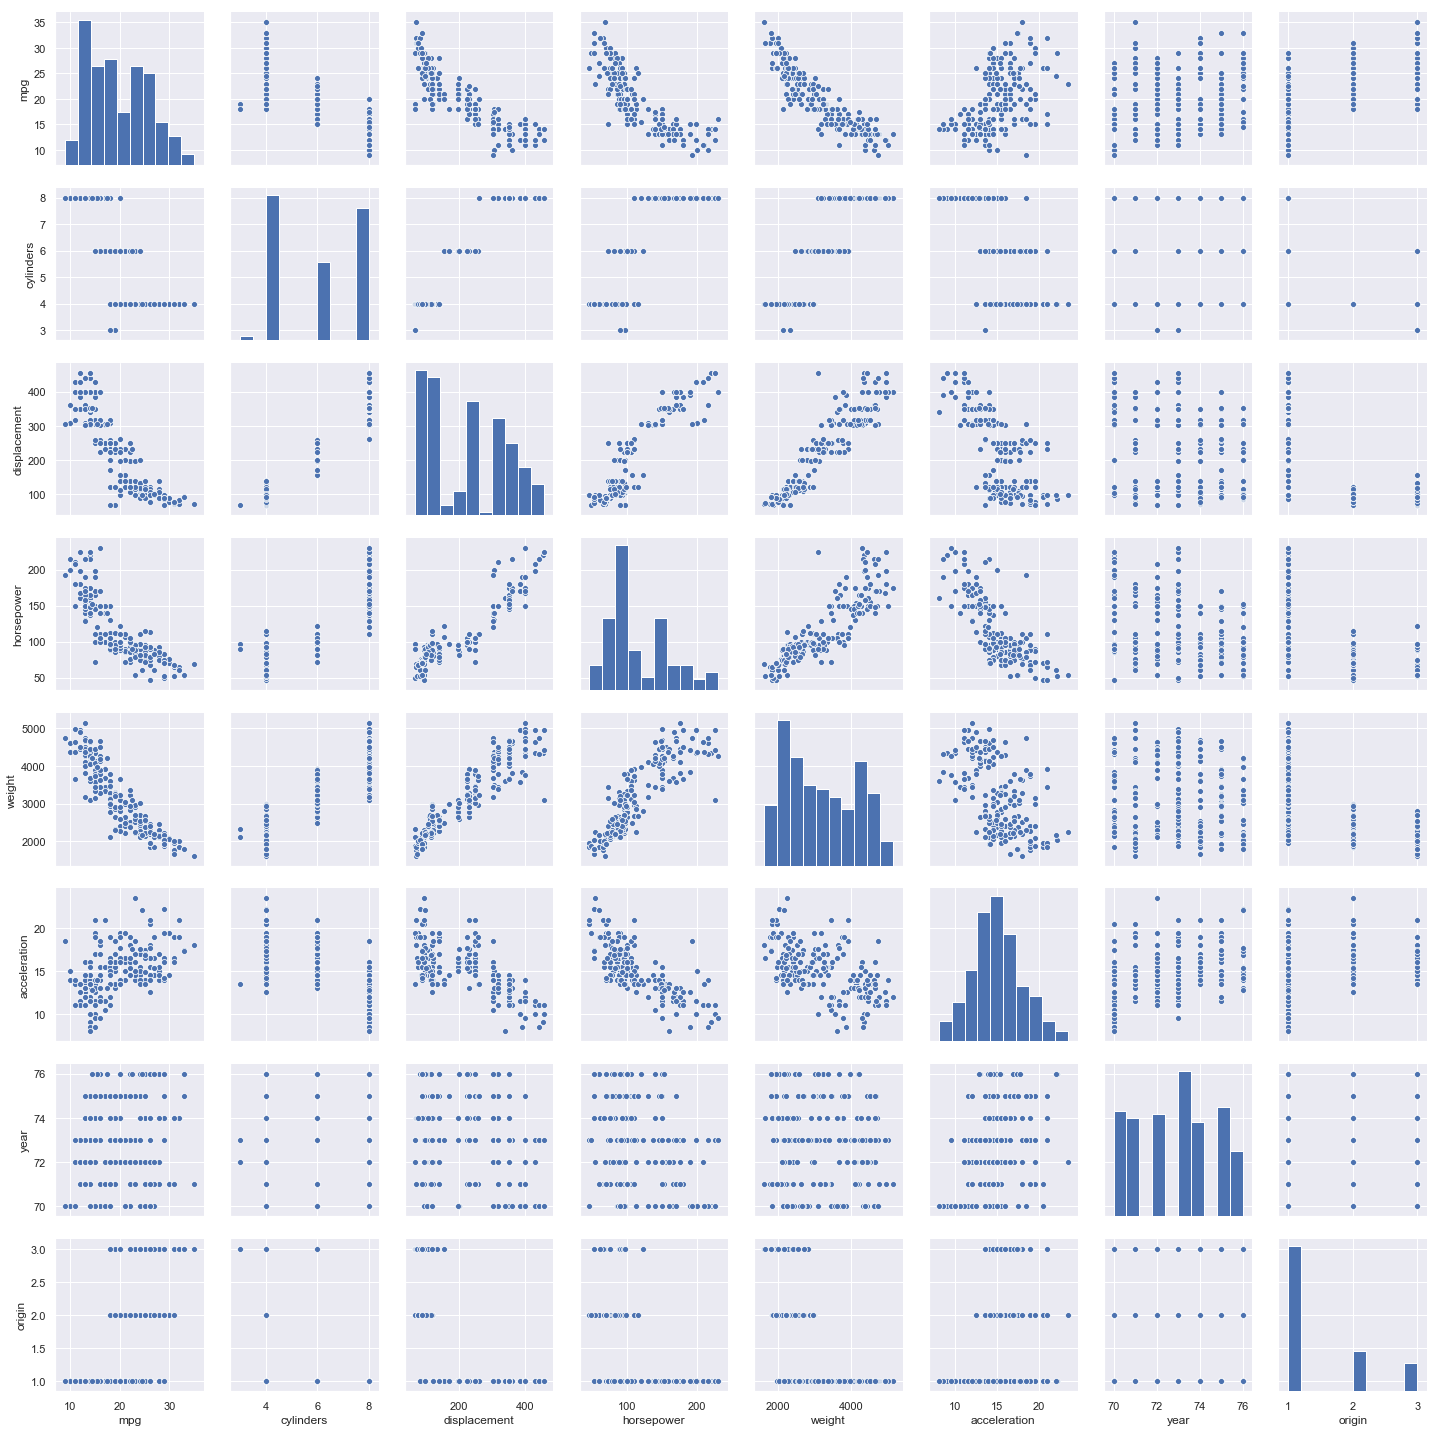

In [6]:
sns.pairplot(df);

## Task b)

Compute the matrix of correlations between the variables using the function cor(). 

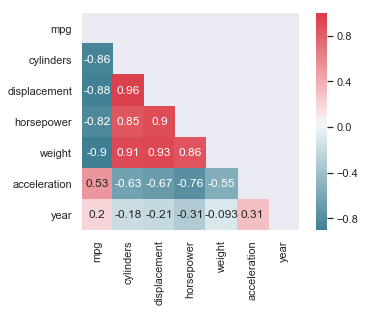

In [7]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

In [8]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.864793,-0.883333,-0.816921,-0.903425,0.529938,0.201195
cylinders,-0.864793,1.000000,0.956399,0.851881,0.911571,-0.633824,-0.177773
displacement,-0.883333,0.956399,1.000000,0.903869,0.931684,-0.673142,-0.207615
horsepower,-0.816921,0.851881,0.903869,1.000000,0.864138,-0.764649,-0.311485
weight,-0.903425,0.911571,0.931684,0.864138,1.000000,-0.552164,-0.093047
acceleration,0.529938,-0.633824,-0.673142,-0.764649,-0.552164,1.000000,0.313283
year,0.201195,-0.177773,-0.207615,-0.311485,-0.093047,0.313283,1.000000


## Task c)

Use the statsmodel ols function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. 

### Multiple Linear Regression

In [9]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [10]:
# fit linear model with statsmodels.formula.api (with R-style formulas) 
lm_all = smf.ols(formula ='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=df).fit()
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     135.5
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           4.96e-74
Time:                        15:57:51   Log-Likelihood:                -442.33
No. Observations:                 198   AIC:                             902.7
Df Residuals:                     189   BIC:                             932.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.8255      7.677      1.801      0.073      -1.319      28.970
origin[T.2]      1.9798      0.631      3.137      0.002       0.735       3.225
origin[T.3]      2.6552      0.692      3.836      0.000       1.290       4.021
cylinders       -0.1625      0.332     -0.489      0.625      -0.817       0.493
displacement    -0.0004      0.007     -0.051      0.959      -0.014       0.013
horsepower      -0.0159      0.012     -1.338      0.182      -0.039       0.008
weight          -0.0040      0.001     -6.788      0.000      -0.005      -0.003
acceleration    -0.0655      0.101     -0.649      0.517      -0.265       0.134
year             0.2990      0.100      2.999      0.003       0.102       0.496
==============================================================================
Omnibus:                       13.338   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.107
Skew:                          -0.425   Prob(JB):                     7.10e-05
Kurtosis:                       4.262   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### c3) Interpretation

Comment on the output. 

**1. Is there a relationship between the predictors and the response?**

Yes, there is indication for a relationship between the predictors and the response: the null hypothesis of whether all the regression coefficients are zero can be rejected since the F-statistic is far greater than 1 (with a small p-value). 

Furthermore, the (adjusted) $R^2$ value is relatively high. However, this could be due to overfitting.

**2.Which predictors appear to have a statistically significant relationship to the response?**

Looking at the p-values associated with each predictor’s t-statistic, we observe that the predictors weight, year and origin have a statistically significant (p-values below 1%) relationship, while the others do not.

**3. What does the coefficient for the year variable suggest?**

The regression coefficient for year, 0.299, suggests that for every one year (i.e. newer cars), mpg increases by the value of the coefficient (i.e. around 0.3). In other words, cars become more fuel efficient every year by almost 0.3 mpg/year.

# Task 2 (d)

Use diagnostic plots (1. Residuals vs fitted plot, 2. Normal Q-Q plot, 3. Scale-location plot, 4. Residuals vs leverage plot) to describe the linear regression fit. Comment on any problems you see with the fit. 

### 1) Residuals vs fitted plot

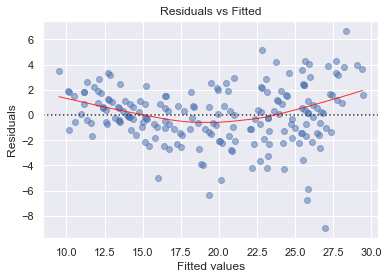

In [11]:
model_fitted_y = lm_all.fittedvalues;
plot = sns.residplot(model_fitted_y, 'mpg', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 
                               'lw': 1, 'alpha': 0.8});

plot.set_title('Residuals vs Fitted');
plot.set_xlabel('Fitted values');
plot.set_ylabel('Residuals');

The residuals are not equally spread around a horizontal line which is an indication for a non-linear relationship. 

### 2) Normal Q-Q

This plots the standardized (z-score) residuals against the theoretical normal quantiles. Anything quite off the diagonal lines may be a concern for further investigation.

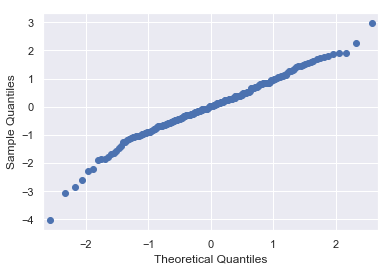

In [18]:
# Use standardized residuals
sm.qqplot(lm_all.get_influence().resid_studentized_internal);

We can observe that some residuals (in the upper right corner) deviate from the straight line.

### Scale-Location plot

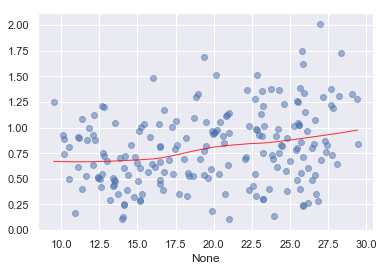

In [19]:
# Scale Location plot
plt.scatter(lm_all.fittedvalues, np.sqrt(np.abs(lm_all.get_influence().resid_studentized_internal)), alpha=0.5)
sns.regplot(lm_all.fittedvalues, np.sqrt(np.abs(lm_all.get_influence().resid_studentized_internal)), 
            scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

In our model the residuals begin to spread wider along the y-axis with increasing values of x. This is an indication of heteroskedasticity (but only to a small extent).

### Residuals vs leverage plot

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(lm_all, ax = ax)

We can observe that case 13 appears to have a high leverage in comparision to other values. However, the residual's magnitude is small and thererfore of no great concern.  

## Task e) 

Use the * and : symbols to fit linear regression models with **interaction effects**. Do any interactions appear to be statistically significant?

**Explanation of interaction effects:**

  - The syntax var1:var2 tells Python to include an interaction term between var1 and var2. 

  - The syntax $var1*var2$ simultaneously includes var1, var2 *and* the interaction term var1×var2 as predictors; it is a shorthand for
var1 + var2 + var1:var2.

Possible strategy: use the preditors with the highest correlation (here, I only use two the highest values).

In [ ]:
# Fit the model with interaction effect *
lm_int = smf.ols(formula = 'mpg ~ cylinders*displacement + displacement*weight', data=df).fit()
lm_int.summary()

To see the difference between * and :, compare the predictors in the summary with the next model:

In [ ]:
# Fit the model with interaction effect :
lm_int = smf.ols(formula = 'mpg ~ cylinders:displacement + displacement:weight', data=df).fit()
lm_int.summary()

**Strategy 2: test all possible combinations and select significant results.**

In [ ]:
# Function to print results of interaction
def test_interaction(df, variables):
    lm_temp = smf.ols(formula='mpg ~ ' + variables , data=df).fit()
    print(f'{variables:<30} coeff: {lm_temp.params[1:].values[-1]:.5f} \t pvalue: {lm_temp.pvalues[0]:.7f}')

# Create all possible iterations
variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
combinations = list(itertools.combinations(variables, 2))

print('Combinations [var1 : var2] :')
for i in combinations:
    test_interaction(df, i[0]+':'+i[1])
    
print('\nCombinations [var1 * var2] :')
for i in combinations:
    test_interaction(df, i[0]+'*'+i[1])

**Result:** 

Many interactions are significant, however only a view have useful coefficients:

```
cylinders:origin           coeff: -1.71637 	pvalue: 0.00
acceleration:origin        coeff: 1.15201 	 pvalue: 0.00
year:origin                coeff: 0.61136 	 pvalue: 0.00
cylinders*origin           coeff: 3.02291 	 pvalue: 0.00
acceleration*origin        coeff: 0.71755 	 pvalue: 0.00
```

Be aware that the significance of individual predictors may change if we alter the number of predictors in the model. 

## Task e) Part II  

- Try different transformations of the X variable 'horsepower', such as log(X), sqrt(x) and $X^2$ and compare the fit with the simple model without transformation. Use the adjusted R-squared, the F-Statistic,mean squared error of residuals (MSE), the Bayesian Information Criterion (BIC) and Akaike's Information criterion (AIC) to comment on your findings. 

Hint: given a predictor X, we can create a predictor $X^2$ using $I(X**2)$. The function I() is needed since somy symbols have a special meaning in a formula. Furthermore, you can use np.sqrt(X) and np.log(X).

In [ ]:
# For reference, print a simple model:
lm = smf.ols(formula='mpg ~ horsepower', data=df).fit()
display(lm.summary())

In [ ]:
# log(X):
lm_log = smf.ols(formula='mpg ~ np.log(horsepower)', data=df).fit()
display(lm_log.summary())

In [ ]:
# X²:
lm_sqr = smf.ols(formula='mpg ~ I(horsepower**2)', data=df).fit()
display(lm_sqr.summary())

In [ ]:
# sqrt(X):
lm_sqrt = smf.ols(formula='mpg ~ np.sqrt(horsepower)', data=df).fit()
display(lm_sqrt.summary())

In [ ]:
print('Adj. R-squared of simple model:', lm.rsquared_adj )
print('Adj. R-squared of of log model:', lm_log.rsquared_adj )
print('Adj. R-squared of sqrt model', lm_sqrt.rsquared_adj )
print('-'*50)
print('F-statistic of simple model:', lm.fvalue)
print('F-statistic of of log model:', lm_log.fvalue)
print('F-statistic of sqrt model', lm_sqrt.fvalue)
print('-'*50)
print('MSE of residuals of simple model:', lm.mse_resid)
print('MSE of residuals of log model:', lm_log.mse_resid)
print('MSE of sqrt model', lm_sqrt.mse_resid)
print('-'*50)
print('BIC of residuals of simple model:', lm.bic)
print('BIC of residuals of log model:', lm_log.bic)
print('BIC of sqrt model', lm_sqrt.bic)
print('-'*50)
print('AIC of residuals of simple model:', lm.aic)
print('AIC of residuals of log model:', lm_log.aic)
print('AIC of sqrt model', lm_sqrt.aic)

**Comments on findings:**
- log(X) performes best for all relevant measures